In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os

import validate

/Users/wulfebw/Programming/miniconda3/envs/rllab3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
length = 200

In [5]:
def load_trajs_labels(directory):
    filenames = [
        'trajdata_i101_trajectories-0750am-0805am_trajectories.npz',
        'trajdata_i101_trajectories-0805am-0820am_trajectories.npz',
        'trajdata_i101_trajectories-0820am-0835am_trajectories.npz'
    ]
    labels = [fn[27:40] for fn in filenames]
    filepaths = [os.path.join(directory, fn) for fn in filenames]
    trajs = [validate.load_trajectories(fp) for fp in filepaths]
    return trajs, labels

In [6]:
directory = '../../data/experiments/NGSIM-infogail_4_latent/imitate/validation/'
infogail_trajs, infogail_labels = load_trajs_labels(directory)
directory = '../../data/experiments/NGSIM-gail/imitate/validation/'
gail_trajs, gail_labels = load_trajs_labels(directory)

In [7]:
def visualize_trajectories(trajs, length, label='', color='blue', attr='rmse'):
    rmses = []
    for traj in trajs:
        if len(traj[attr]) == length:
            rmses.append(traj[attr])
    rmses = np.array(rmses)
    mean = np.mean(rmses, axis=0)
    bound = np.std(rmses, axis=0) / np.sqrt(len(rmses)) / 2
    x = range(len(mean))
    plt.fill_between(x, mean - bound, mean + bound, alpha=.4, color=color)
    plt.plot(x, mean, c=color, label='mean {}: {:.5f}'.format(attr, np.mean(rmses)))
    plt.xlabel('timesteps')
    plt.ylabel(attr)
    plt.title(label)
    plt.legend()

In [8]:
def plot_validation(trajs, labels, color='blue', length=200, attr='rmse'):
    for i, traj in enumerate(trajs):
        plt.subplot(1,3,i+1)
        visualize_trajectories(traj, length, labels[i], attr=attr, color=color)

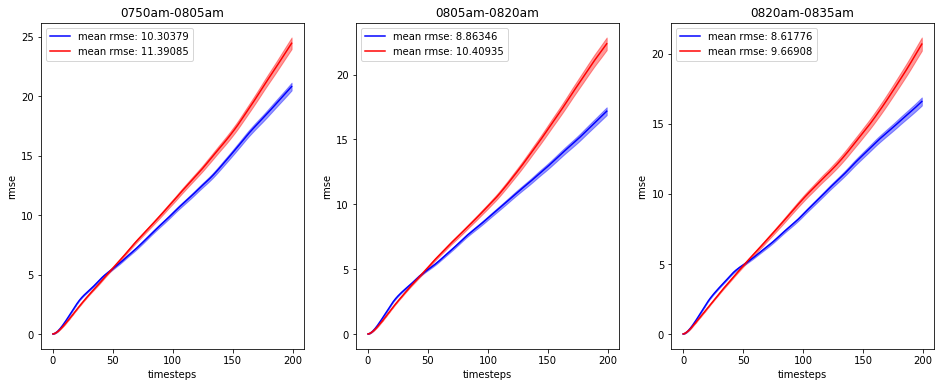

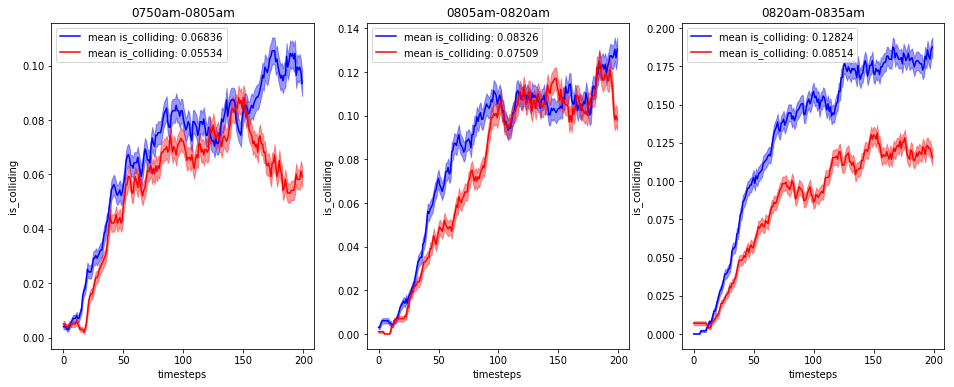

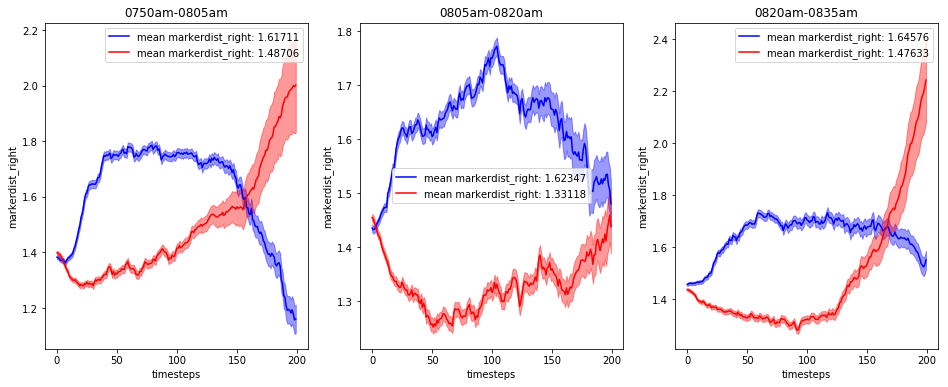

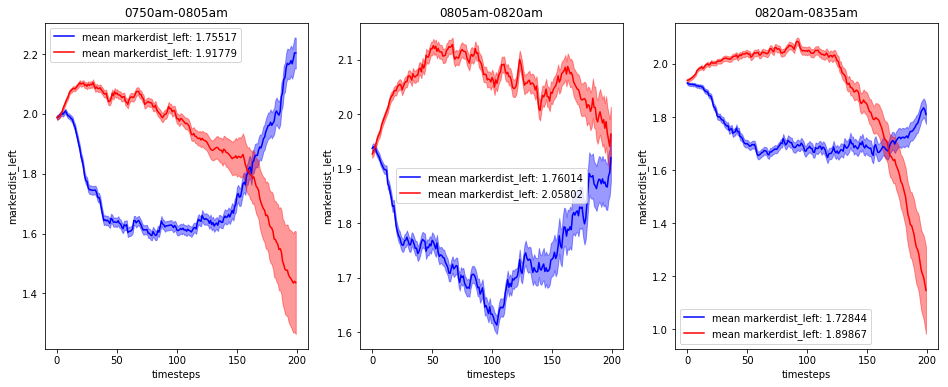

In [9]:
attrs = ['rmse', 'is_colliding', 'markerdist_right', 'markerdist_left']
for attr in attrs:
    plt.figure(figsize=(16,6))
    plot_validation(infogail_trajs, infogail_labels, color='blue', attr=attr)
    plot_validation(gail_trajs, gail_labels, color='red', attr=attr)
    plt.show()